# Case STudy: Olimpic Medals

- data from Olimpic games 
- stored in TSV format or "tab-separaed values

# Reminder: indexing & pivoting

- filtering and indexing
    - One-level indexing
    - Multi-level indexing
- Reshaping DataFrames with pivot()
- pivot_table

# Reminder: groupby

- Useful DataFrame methods
    - unique()
    - value_counts()
- Aggregations, transformations, filtering

---
# Let's Practice!

In [7]:
import pandas as pd
medals = pd.read_csv('all_medalists.csv')
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null object
Edition         29216 non-null int64
Sport           29216 non-null object
Discipline      29216 non-null object
Athlete         29216 non-null object
NOC             29216 non-null object
Gender          29216 non-null object
Event           29216 non-null object
Event_gender    29216 non-null object
Medal           29216 non-null object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


In [11]:
USA_edition_grouped = medals.loc[medals.NOC == 'USA'].groupby('Edition')
USA_edition_grouped['Medal'].count()

Edition
1896     20
1900     55
1904    394
1908     63
1912    101
1920    193
1924    198
1928     84
1932    181
1936     92
1948    148
1952    130
1956    118
1960    112
1964    150
1968    149
1972    155
1976    155
1984    333
1988    193
1992    224
1996    260
2000    248
2004    264
2008    315
Name: Medal, dtype: int64

In [16]:
# Using .value_counts() for ranking
# Select the 'NOC' column of medals: country_names
country_names = medals.NOC

# Count the number of medals won by each country: medal_counts
medal_counts = country_names.value_counts()

# Print top 15 countries ranked by medals
print(medal_counts.head(15))

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64


In [17]:
# Using .pivot_table() to count medals by type
# Construct the pivot table: counted
counted = medals.pivot_table(index='NOC',
                            columns='Medal',
                            values='Athlete',
                            aggfunc='count')

# Create the new column: counted['totals']
counted['totals'] = counted.sum(axis='columns')

# Sort counted by the 'totals' column
counted = counted.sort_values('totals', ascending=False)

# Print the top 15 rows of counted
print(counted.head(15))



Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
GER     454.0   407.0   350.0  1211.0
AUS     413.0   293.0   369.0  1075.0
HUN     345.0   400.0   308.0  1053.0
SWE     325.0   347.0   349.0  1021.0
GDR     225.0   329.0   271.0   825.0
NED     320.0   212.0   250.0   782.0
JPN     270.0   206.0   228.0   704.0
CHN     193.0   234.0   252.0   679.0
RUS     240.0   192.0   206.0   638.0
ROU     282.0   155.0   187.0   624.0


---
# Understanding the column labels
### “Gender” and “Event_gender”

In [20]:
medals[['Gender', 'Event_gender']].head()

,Gender,Event_gender
0,Men,M
1,Men,M
2,Men,M
3,Men,M
4,Men,M


# Reminder: slicing & filtering
- Indexing and slicing
    - .loc[] and .iloc[] accessors
- Filtering
    - Selecting by Boolean Series
    - Filtering null/non-null and zero/non-zero values

# Reminder: Handling categorical data
- Useful DataFrame methods for handling categorical data:
    - value_counts()
    - unique()
    - groupby()
- groupby() aggregations:
    - mean(), std(), count()

---
# Let's Practice!

In [21]:
# Applying .drop_duplicates()
# Select columns: ev_gen
ev_gen = medals[['Event_gender', 'Gender']]

# Drop duplicate pairs: ev_gen_uniques
ev_gen_uniques = ev_gen.drop_duplicates()

# Print ev_gen_uniques
print(ev_gen_uniques)

      Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men


In [22]:
# Finding possible errors with .groupby()

# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(['Event_gender', 'Gender'])

# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

# Print medal_count_by_gender
print(medal_count_by_gender)

                      City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218  


In [23]:
# Locating suspicious data
# Create the Boolean Series: sus
sus = (medals.Event_gender == 'W')& (medals.Gender =='Men')

# Create a DataFrame with the suspicious row: suspect
suspect = medals[sus]

# Print suspect
print(suspect)

         City  Edition      Sport Discipline            Athlete  NOC Gender  \
23675  Sydney     2000  Athletics  Athletics  CHEPCHUMBA, Joyce  KEN    Men   

          Event Event_gender   Medal  
23675  marathon            W  Bronze  


---
# Constructing alternative country rankings

### Counting distinct events

In [26]:
medals['Sport'].unique()  # 42 distinct events

array(['Aquatics', 'Athletics', 'Cycling', 'Fencing', 'Gymnastics',
       'Shooting', 'Tennis', 'Weightlifting', 'Wrestling', 'Archery',
       'Basque Pelota', 'Cricket', 'Croquet', 'Equestrian', 'Football',
       'Golf', 'Polo', 'Rowing', 'Rugby', 'Sailing', 'Tug of War',
       'Boxing', 'Lacrosse', 'Roque', 'Hockey', 'Jeu de paume', 'Rackets',
       'Skating', 'Water Motorsports', 'Modern Pentathlon', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak', 'Handball', 'Judo', 'Volleyball',
       'Table Tennis', 'Badminton', 'Baseball', 'Softball', 'Taekwondo',
       'Triathlon'], dtype=object)

### Ranking of distinct events
- Top five countries that have won medals in the most sports
- Compare medal counts of USA and USSR from 1952 to 1988

### Two new DataFrame methods
- `idxmax()`: Row or column label where maximum value is located
- `idxmin()`: Row or column label where minimum value is located

### idxmax() Example

In [27]:
!ls

01Extracting_and_transforming_data.ipynb  pittsburgh2013.csv
02Advanced_indexing.ipynb		  regions.csv
03Rearranging_and_reshaping_data.ipynb	  sales.csv
04Grouping_data.ipynb			  sales-feb-2015.csv
05Bringing_it_all_together.ipynb	  titanic.csv
all_medalists.csv			  trials_01.csv
auto-mpg.csv				  trials_02.csv
gapminder_tidy.csv			  trials_03.csv
life_expectancy.csv			  users.csv
pennsylvania2012_turnout.csv		  visitors.csv


### Using idxmax()

### Using idxmax() along columns

### Using idxmin()

---
# Let’s practice!

In [28]:
# Using .nunique() to rank by distinct sports

# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby('NOC')

# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped['Sport'].nunique()

# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending=False)

# Print the top 15 rows of Nsports
print(Nsports.head(15))

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64


In [31]:
# Counting USA vs. USSR Cold War Olympic Sports

# Extract all rows for which the 'Edition' is between 1952 & 1988: during_cold_war
during_cold_war = (medals.Edition >= 1952)&(medals.Edition <= 1988)

# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
is_usa_urs = medals.NOC.isin(['USA','URS'])

# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

# Create Nsports
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)

# Print Nsports
print(Nsports)

NOC
URS    21
USA    20
Name: Sport, dtype: int64


In [32]:
# Counting USA vs. USSR Cold War Olympic Medals

# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index='Edition',
                                            columns='NOC',
                                            values='Athlete',
                                            aggfunc='count')

# Slice medals_won_by_country: cold_war_usa_usr_medals
cold_war_usa_usr_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]

# Create most_medals 
most_medals = cold_war_usa_usr_medals.idxmax(axis='columns')

# Print most_medals.value_counts()
print(most_medals.value_counts())


URS    8
USA    2
dtype: int64


---
# Reshaping DataFrames for visualization

# Reminder: plo!ing DataFrames

In [37]:
import matplotlib.pyplot as plt
all_medals = medals.groupby('Edition')['Athlete'].count()
all_medals.head(6)

Edition
1896     151
1900     512
1904     470
1908     804
1912     885
1920    1298
Name: Athlete, dtype: int64

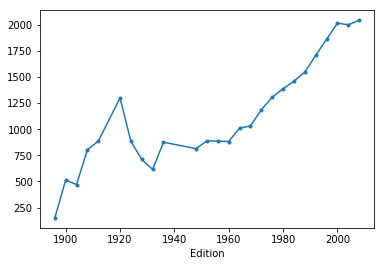

In [38]:
all_medals.plot(kind='line', marker='.')
plt.show()

### Grouping the data

In [39]:
france = medals.NOC == 'FRA'  # boolean series for France

france_grps = medals[france].groupby(['Edition', 'Medal'])

france_grps['Athlete'].count().head(10)

Edition  Medal 
1896     Bronze     2
         Gold       5
         Silver     4
1900     Bronze    53
         Gold      46
         Silver    86
1908     Bronze    21
         Gold       9
         Silver     5
1912     Bronze     5
Name: Athlete, dtype: int64

### Reshaping the data

In [40]:
france_medals = france_grps['Athlete'].count().unstack()

france_medals.head(12)  # single level index

Medal,Bronze,Gold,Silver
Edition,,,
1896,2.0,5.0,4.0
1900,53.0,46.0,86.0
1908,21.0,9.0,5.0
1912,5.0,10.0,10.0
1920,55.0,13.0,73.0
1924,20.0,39.0,63.0
1928,13.0,7.0,16.0
1932,6.0,23.0,8.0
1936,18.0,12.0,13.0


### Plo!ing the result

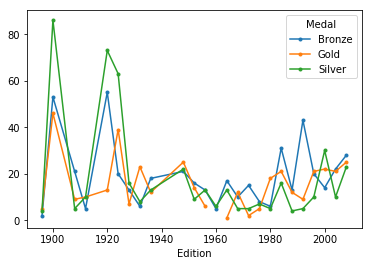

In [41]:
france_medals.plot(kind='line', marker='.')
plt.show()

---
# Let’s practice!

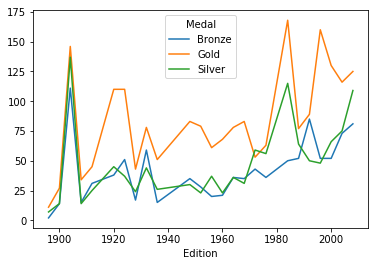

In [53]:
# Visualizing USA Medal Counts by Edition: Line Plot

# Create the DataFrame: usa
usa = medals[medals.NOC =='USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition','Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()
plt.show()

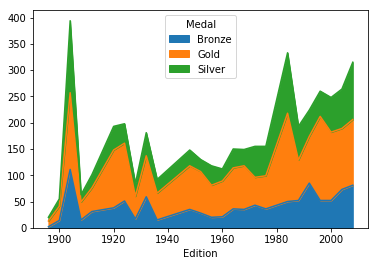

In [55]:
# Visualizing USA Medal Counts by Edition: Area Plot

# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()

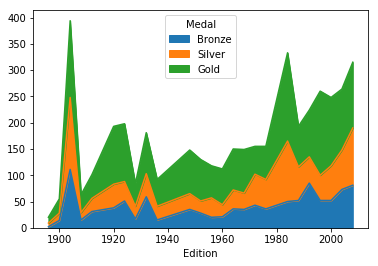

In [59]:
# Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values=medals.Medal,
                categories=['Bronze', 'Silver', 'Gold'],
                ordered=True)

# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()


In [58]:
pd.Categorical(values=medals.Medal, categories=['Bronze', 'Silver', 'Gold'], ordered=True)

[Gold, Silver, Bronze, Gold, Silver, ..., Silver, Bronze, Bronze, Gold, Silver]
Length: 29216
Categories (3, object): [Bronze < Silver < Gold]

---
# You can now…
- Transform, extract, and filter data from DataFrames
- Work with pandas indexes and hierarchical indexes
- Reshape and restructure your data
- Split your data into groups and categories